In [ ]:
#Шаг №1: Получение исторических данных об акциях с мосбиржи

In [4]:
import requests
import datetime
import pathlib
import apimoex
import pandas as pd

board = 'TQBR'

with open("C:\PYEX\TICK.txt", "r") as TICKs:
    TICKs = [line.rstrip() for line in TICKs]
pathlib.Path("C:\PYEX\Database\{}".format(board)).mkdir(parents=True, exist_ok=True)
process = 0
with requests.Session() as session:
    for TICK in TICKs:
         process = process + 1
         print((process / len(TICKs)) * 100, ' %')
         data = apimoex.get_board_history(session, TICK, board=board)
         if data == []:
             continue
         df = pd.DataFrame(data)
         df = df[['TRADEDATE','CLOSE']]
         df.to_excel("C:\PYEX\Database\{}\{}.xlsx".format(board,TICK), index=False)

10.0  %
20.0  %
30.0  %
40.0  %
50.0  %
60.0  %
70.0  %
80.0  %
90.0  %
100.0  %


In [ ]:
#Теперь объеденим 10 xlsx файлов в один csv файл.

In [53]:
import os

# Путь к папке, содержащей файлы Excel
folder_path = 'C:\PYEX\Database\TQBR'

# Список названий файлов Excel с данными об акциях
file_names = ['AFLT.xlsx', 'GAZP.xlsx', 'LKOH.xlsx', 'MOEX.xlsx', 'ROSN.xlsx',
              'SBER.xlsx', 'SVCB.xlsx', 'TATNP.xlsx', 'VTBR.xlsx', 'YNDX.xlsx']

# Создание пустого DataFrame для хранения всех данных
all_data = pd.DataFrame()

# Чтение данных из каждого файла и объединение их в один DataFrame
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    if os.path.exists(file_path):
        data = pd.read_excel(file_path)
        all_data = pd.concat([all_data, data], ignore_index=True)
    else:
        print(f'Файл {file_name} не найден.')

# Сохранение объединенных данных в файл CSV
all_data.to_csv('stocks_data.csv', index=False)


In [ ]:
#----------------

In [45]:
# Чтение данных из CSV файла в DataFrame
df = pd.read_csv('stocks_data.csv')

# Группировка данных по названию акции и заполнение пустых значений медианным для каждой акции
df['CLOSE'] = df.groupby('NAME')['CLOSE'].transform(lambda x: x.fillna(x.median()))

# Вывод первых нескольких строк DataFrame
print(df.head())



    TRADEDATE  CLOSE  NAME
0  2013-10-31  57.40  AFLT
1  2013-11-01  57.38  AFLT
2  2013-11-05  56.85  AFLT
3  2013-11-06  57.40  AFLT
4  2013-11-07  58.45  AFLT


In [46]:
# Чтение данных из CSV файла в DataFrame
df = pd.read_csv('stocks_data.csv')

# Расчет доходности для каждой акции
df['Returns'] = df.groupby('NAME')['CLOSE'].pct_change()

# Группировка данных по названию акции
grouped_data = df.groupby('NAME')

# Расчет ожидаемой доходности (среднее арифметическое) и риска (стандартное отклонение) для каждой акции
for name, group in grouped_data:
    expected_return = round(group['Returns'].mean()*100,3)
    risk = round(group['Returns'].std(),2)
    print(f'Акция: {name}')
    print('Ожидаемая доходность:', expected_return,'%')
    print('Риск:', risk)
    print()


Акция: AFLT
Ожидаемая доходность: 0.013 %
Риск: 0.02

Акция: GAZP
Ожидаемая доходность: 0.026 %
Риск: 0.02

Акция: LKOH
Ожидаемая доходность: 0.067 %
Риск: 0.02

Акция: MOEX
Ожидаемая доходность: 0.071 %
Риск: 0.02

Акция: ROSN
Ожидаемая доходность: 0.058 %
Риск: 0.02

Акция: SBER
Ожидаемая доходность: 0.065 %
Риск: 0.02

Акция: SVCB
Ожидаемая доходность: 0.835 %
Риск: 0.03

Акция: TATNP
Ожидаемая доходность: 0.095 %
Риск: 0.02

Акция: VTBR
Ожидаемая доходность: -0.004 %
Риск: 0.02

Акция: YNDX
Ожидаемая доходность: 0.078 %
Риск: 0.02



In [ ]:
#Корреляционная матрица

In [47]:
# Загрузка данных из CSV файла в DataFrame
df = pd.read_csv('stocks_data.csv')

# Поворот данных: преобразование столбцов с названиями акций в индексы, а значения цен закрытия - в ячейки
pivot_df = df.pivot(index='TRADEDATE', columns='NAME', values='CLOSE')

# Вычисление корреляции между разными акциями
correlation_matrix = pivot_df.corr()

# Вывод корреляционной матрицы
print(correlation_matrix)



NAME       AFLT      GAZP      LKOH      MOEX      ROSN      SBER      SVCB   
NAME                                                                          
AFLT   1.000000 -0.250868 -0.105430  0.066701 -0.063130  0.205811  0.628312  \
GAZP  -0.250868  1.000000  0.690604  0.415845  0.672708  0.594906 -0.427741   
LKOH  -0.105430  0.690604  1.000000  0.763387  0.928774  0.888375  0.908009   
MOEX   0.066701  0.415845  0.763387  1.000000  0.812380  0.834841  0.426997   
ROSN  -0.063130  0.672708  0.928774  0.812380  1.000000  0.880835 -0.071402   
SBER   0.205811  0.594906  0.888375  0.834841  0.880835  1.000000  0.939057   
SVCB   0.628312 -0.427741  0.908009  0.426997 -0.071402  0.939057  1.000000   
TATNP  0.062778  0.486813  0.906918  0.572431  0.759138  0.816175  0.521851   
VTBR   0.432715 -0.279478 -0.473300 -0.136638 -0.396294 -0.291707 -0.042439   
YNDX  -0.063115  0.706331  0.752501  0.732082  0.751258  0.824505  0.960325   

NAME      TATNP      VTBR      YNDX  
NAME         

In [ ]:
#Визуализация данных

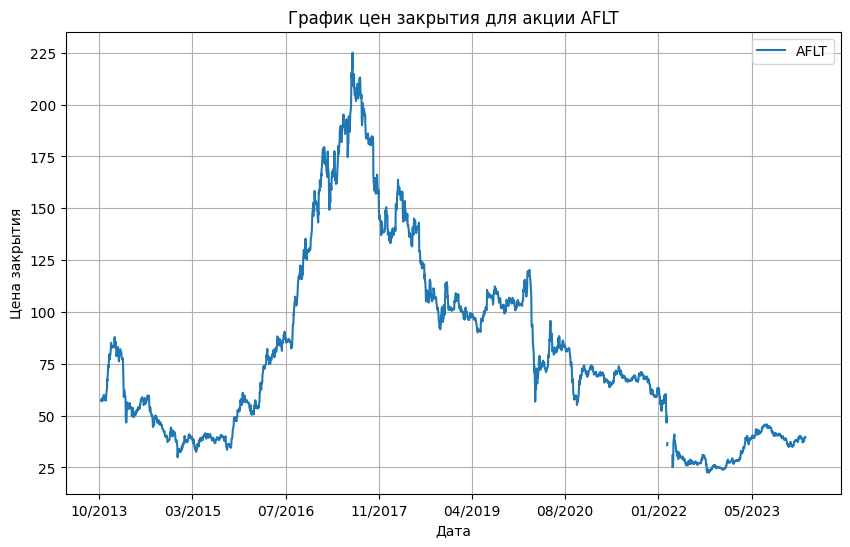

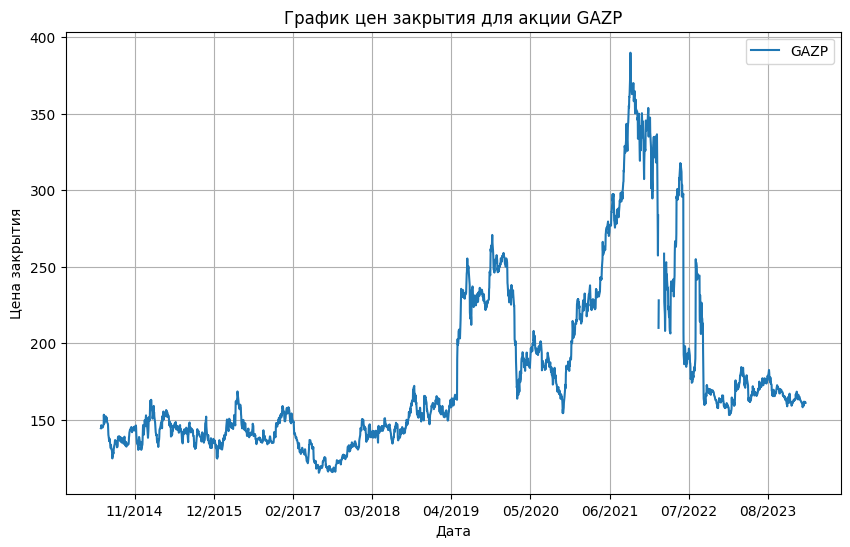

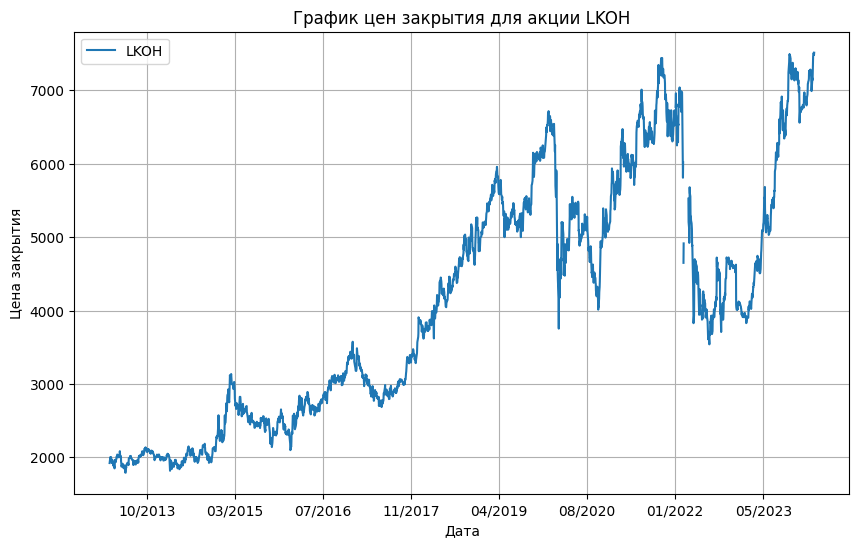

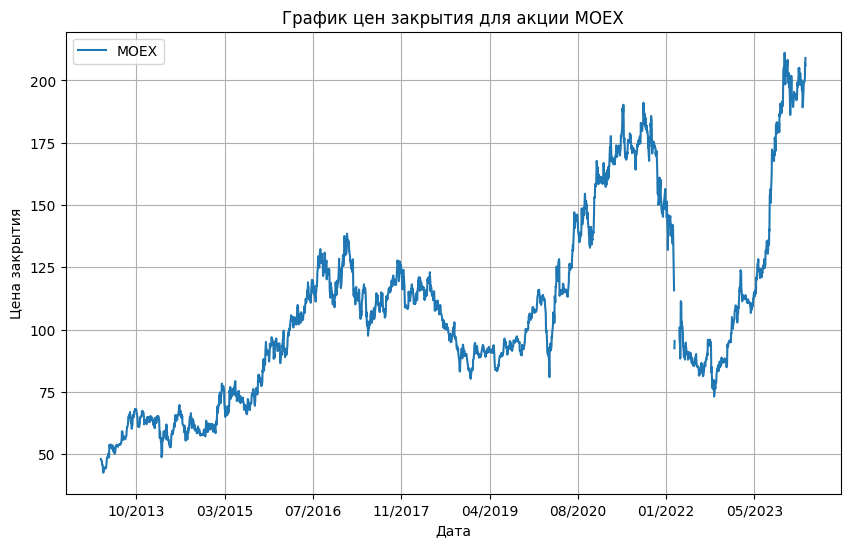

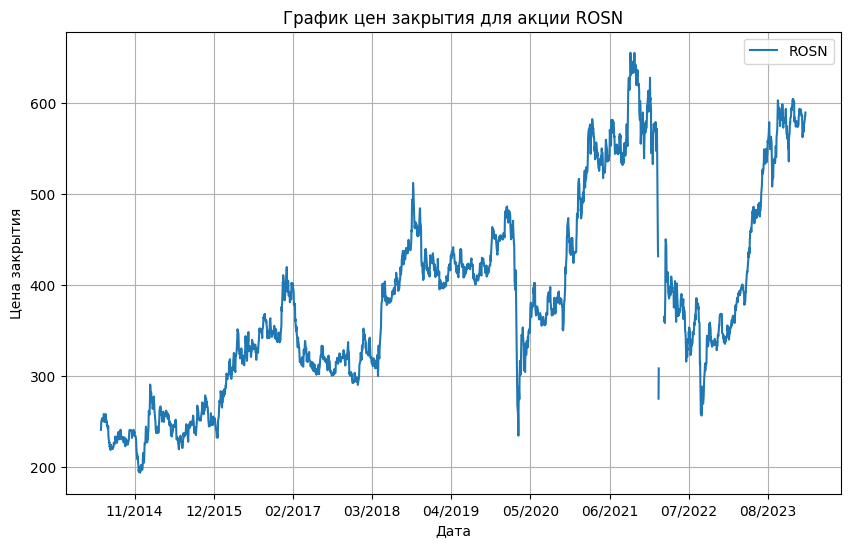

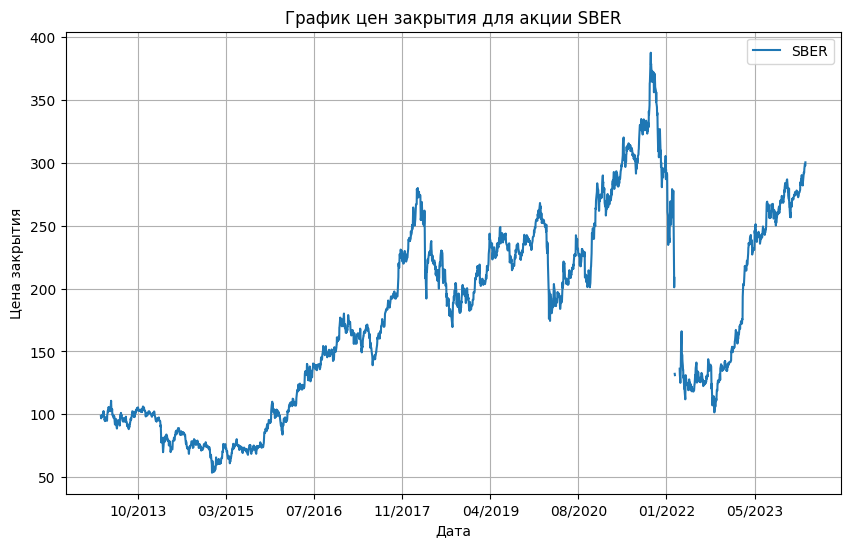

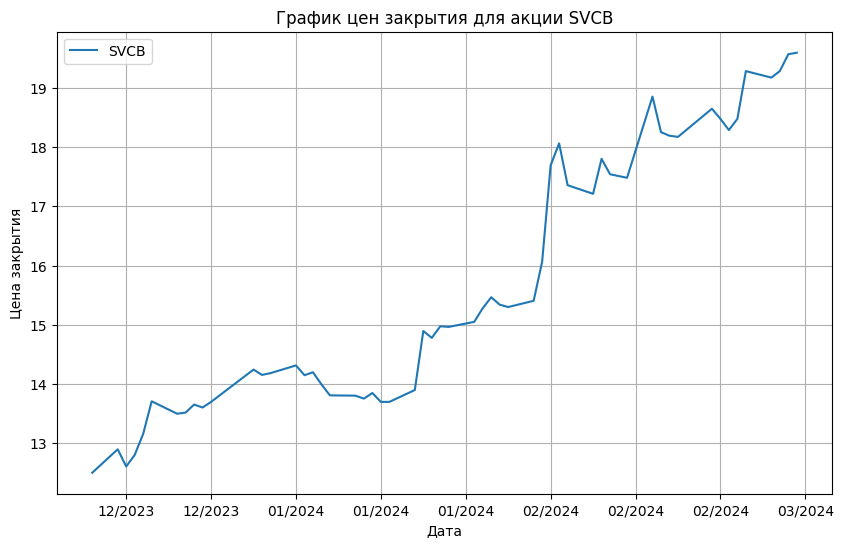

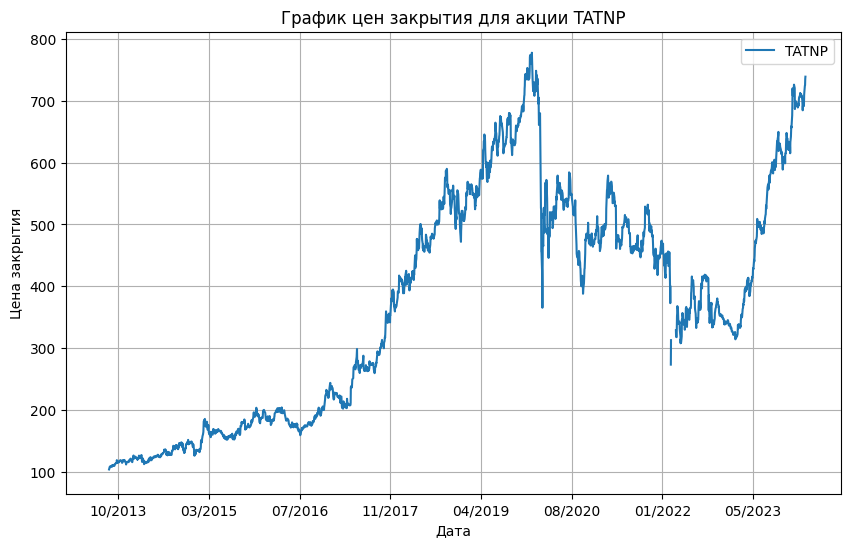

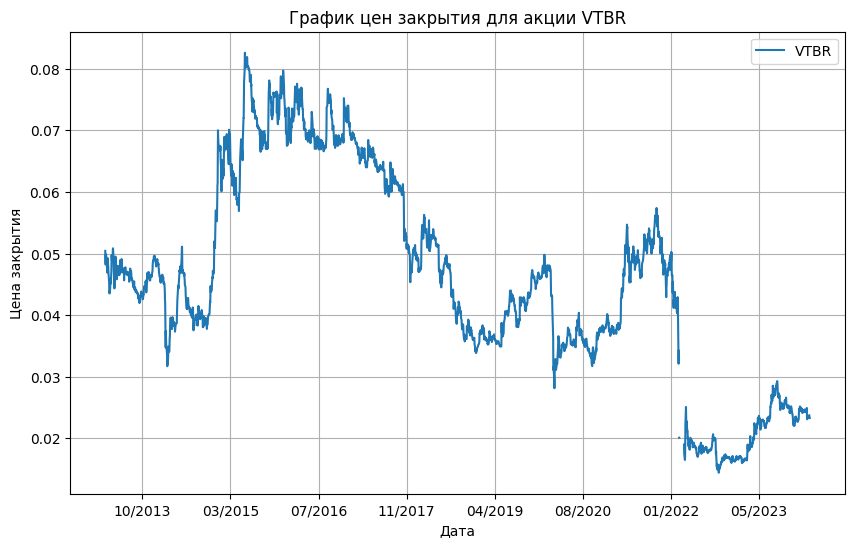

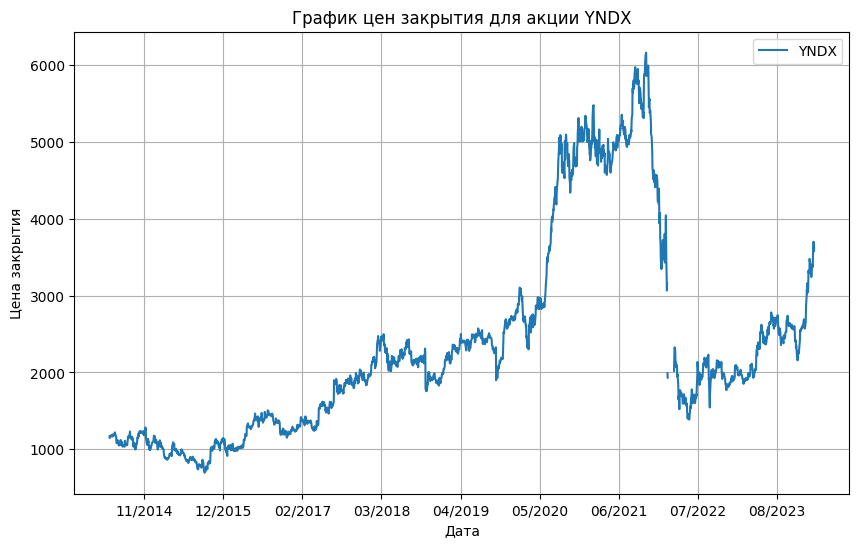

In [50]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Загрузка данных из CSV файла в DataFrame
df = pd.read_csv('stocks_data.csv')

# Преобразование столбца с датами в формат datetime
df['TRADEDATE'] = pd.to_datetime(df['TRADEDATE'])

# Группировка данных по названию акции
grouped_data = df.groupby('NAME')

# Построение графиков для каждой акции
for name, group in grouped_data:
    plt.figure(figsize=(10, 6))
    plt.plot(group['TRADEDATE'], group['CLOSE'], label=name)
    plt.title(f"График цен закрытия для акции {name}")
    plt.xlabel('Дата')
    plt.ylabel('Цена закрытия')
    plt.legend()
    plt.grid(True)
    
    # Форматирование меток по оси X (месяц/год)
    date_format = DateFormatter('%m/%Y')
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))  # Уменьшаем количество меток для лучшей читаемости
    
    plt.show()

